# MetaData

This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`. More details about the contents and use of all these files follows.

This is a *development* dataset. As such, it may change over time and is not an appropriate dataset for shared research results. See available *benchmark* datasets if that is your intent.

This and other GroupLens data sets are publicly available for download at <http://grouplens.org/datasets/>.

User Ids
--------

MovieLens users were selected at random for inclusion. Their ids have been anonymized. User ids are consistent between `ratings.csv` and `tags.csv` (i.e., the same id refers to the same user across the two files).


Movie Ids
---------

Only movies with at least one rating or tag are included in the dataset. These movie ids are consistent with those used on the MovieLens web site (e.g., id `1` corresponds to the URL <https://movielens.org/movies/1>). Movie ids are consistent between `ratings.csv`, `tags.csv`, `movies.csv`, and `links.csv` (i.e., the same id refers to the same movie across these four data files).


Ratings Data File Structure (ratings.csv)
-----------------------------------------

All ratings are contained in the file `ratings.csv`. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:

    userId,movieId,rating,timestamp

The lines within this file are ordered first by userId, then, within user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.


Tags Data File Structure (tags.csv)
-----------------------------------

All tags are contained in the file `tags.csv`. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:

    userId,movieId,tag,timestamp

The lines within this file are ordered first by userId, then, within user, by movieId.

Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.


Movies Data File Structure (movies.csv)
---------------------------------------

Movie information is contained in the file `movies.csv`. Each line of this file after the header row represents one movie, and has the following format:

    movieId,title,genres

Movie titles are entered manually or imported from <https://www.themoviedb.org/>, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

Genres are a pipe-separated list, and are selected from the following:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western
* (no genres listed)


Links Data File Structure (links.csv)
---------------------------------------

Identifiers that can be used to link to other sources of movie data are contained in the file `links.csv`. Each line of this file after the header row represents one movie, and has the following format:

    movieId,imdbId,tmdbId

movieId is an identifier for movies used by <https://movielens.org>. E.g., the movie Toy Story has the link <https://movielens.org/movies/1>.

imdbId is an identifier for movies used by <http://www.imdb.com>. E.g., the movie Toy Story has the link <http://www.imdb.com/title/tt0114709/>.

tmdbId is an identifier for movies used by <https://www.themoviedb.org>. E.g., the movie Toy Story has the link <https://www.themoviedb.org/movie/862>.

Use of the resources listed above is subject to the terms of each provider.


Cross-Validation
----------------

Prior versions of the MovieLens dataset included either pre-computed cross-folds or scripts to perform this computation. We no longer bundle either of these features with the dataset, since most modern toolkits provide this as a built-in feature. If you wish to learn about standard approaches to cross-fold computation in the context of recommender systems evaluation, see [LensKit](http://lenskit.org) for tools, documentation, and open-source code examples.


# Importing libraries and reading the datasets:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ratings = pd.read_csv('C:/Users/91951/Downloads/ml-latest-small/ratings.csv')
movies = pd.read_csv('C:/Users/91951/Downloads/ml-latest-small/movies.csv')
tags = pd.read_csv('C:/Users/91951/Downloads/ml-latest-small/tags.csv')

# Merging ratings and movies dataset on movie id column to form a dataset with movie titles, ratings and genre:

In [3]:
df = pd.merge(left=ratings,right=movies,on='movieId')
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


# Checking for null values:

In [4]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

There are no null values in this dataset.

# Visualizing the average user ratings:

In [5]:
avg_rating = df.groupby('title')['rating'].mean().sort_values(ascending = False)
avg_rating

title
Gena the Crocodile (1969)                  5.0
True Stories (1986)                        5.0
Cosmic Scrat-tastrophe (2015)              5.0
Love and Pigeons (1985)                    5.0
Red Sorghum (Hong gao liang) (1987)        5.0
                                          ... 
Don't Look Now (1973)                      0.5
Journey 2: The Mysterious Island (2012)    0.5
Joe Dirt 2: Beautiful Loser (2015)         0.5
Jesus Christ Vampire Hunter (2001)         0.5
Fullmetal Alchemist 2018 (2017)            0.5
Name: rating, Length: 9719, dtype: float64

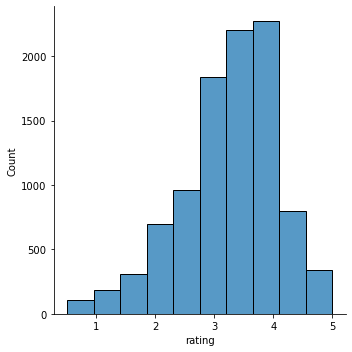

In [6]:
sns.displot(avg_rating, bins = 10)

It appears that most movies have an average rating between 3 and 4.
There are also movies that have an average rating of almost zero or five. These are most likely movies that have been watched very few times.

In [7]:
#Timestamp is an irrelevant attribute, so we delete the column

del df['timestamp']
df.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


# Creating seperate columns for each genre:

In [8]:
df_genres=df['genres'].str.get_dummies(sep='|')
df_genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [9]:
df=pd.merge(df, df_genres, left_index=True, right_index=True)
df.head()

,userId,movieId,rating,title,genres,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.drop(['genres'], axis = 1,inplace=True)
df.head()

,userId,movieId,rating,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,Toy Story (1995),0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,Toy Story (1995),0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,Toy Story (1995),0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,Toy Story (1995),0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,Toy Story (1995),0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


# Counting the no. of movies in each genre:

In [11]:
# making a copy of the movies dataset to perform operations on

df2 = movies.copy()
df2 = pd.merge(df2, df_genres, left_index=True, right_index=True)
df2['Film-Noir'].sum()

0

# Visualizing the number of movies in each genre:

<BarContainer object of 19 artists>

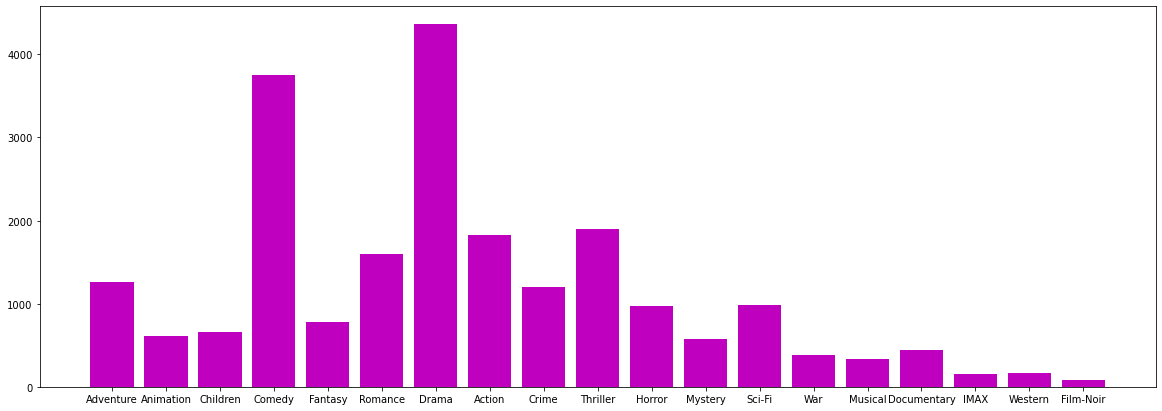

In [12]:
plt.figure(figsize=(20,7))
generlist = movies['genres'].apply(lambda generlist_movie : str(generlist_movie).split("|"))
geners_count = {}

for generlist_movie in generlist:
    for gener in generlist_movie:
        if(geners_count.get(gener,False)):
            geners_count[gener]=geners_count[gener]+1
        else:
            geners_count[gener] = 1       
geners_count.pop("(no genres listed)")
plt.bar(geners_count.keys(),geners_count.values(),color='m')

It appears that most movies in the dataset belong to the drama genre.

# Finding the no. of movies released per year:

In [13]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
df2['year'] = df2.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
df2['year'] = df2.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
df2['title'] = df2.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
df2['title'] = df2['title'].apply(lambda x: x.strip())
df2.head()

<ipython-input-13-19e499e986d6>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['title'] = df2.title.str.replace('(\(\d\d\d\d\))', '')


,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,Jumanji,Adventure|Children|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
2,3,Grumpier Old Men,Comedy|Romance,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Father of the Bride Part II,Comedy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995


C:\Users\91951\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


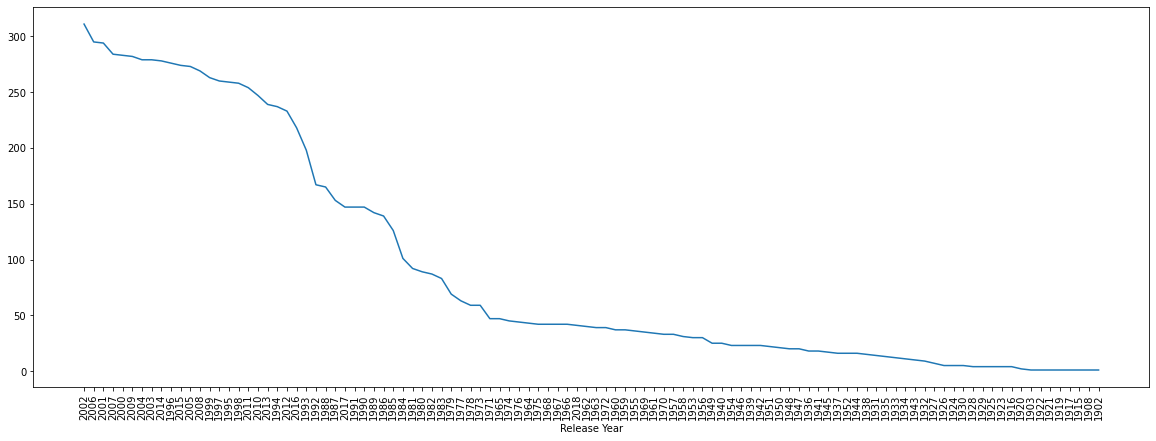

In [14]:
plt.figure(figsize=(20,7))
yearly_count = df2.groupby('year').size().sort_values(ascending=False)
sns.lineplot(yearly_count.index, yearly_count.values);
plt.xticks(rotation = 'vertical')
plt.xlabel('Release Year');

In [15]:
yearly_count

year
2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1919      1
1917      1
1915      1
1908      1
1902      1
Length: 106, dtype: int64

2002 had the most movies releases and it also appears that most movies watched were released during or after the 90's

In [16]:
df.head()

,userId,movieId,rating,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,Toy Story (1995),0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,Toy Story (1995),0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,Toy Story (1995),0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,Toy Story (1995),0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,Toy Story (1995),0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
ratings_matrix_items = df.pivot_table(index=['movieId'],columns=['userId'],values='rating').reset_index(drop=True)
ratings_matrix_items.fillna( 0, inplace = True )
ratings_matrix_items

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
0,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# The objective of the explanatory analysis and pre processing of this dataset is to use it for developing an application that recommends movies to users based on their user profile using collaborative filtering.

# The tools used include Jupyter Notebook, Python libraries: pandas, seaborn etc., Fast API 



In [18]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [19]:
movie_similarity = 1 - pairwise_distances( ratings_matrix_items.values, metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
ratings_matrix_items = pd.DataFrame( movie_similarity )
ratings_matrix_items

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.000000,0.410562,0.296917,0.035573,0.308762,0.376316,0.277491,0.131629,0.232586,0.395573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.410562,0.000000,0.282438,0.106415,0.287795,0.297009,0.228576,0.172498,0.044835,0.417693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.296917,0.282438,0.000000,0.092406,0.417802,0.284257,0.402831,0.313434,0.304840,0.242954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.035573,0.106415,0.092406,0.000000,0.188376,0.089685,0.275035,0.158022,0.000000,0.095598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.308762,0.287795,0.417802,0.188376,0.000000,0.298969,0.474002,0.283523,0.335058,0.218061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
9720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
9721,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
9722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [20]:
#This function takes input of a movie name, finds its index in the movies dataframe and then adds the corresponding similarities to a new column. 

def item_similarity(movieName): 

    try:
        #user_inp=input('Enter the reference movie title based on which recommendations are to be made: ')
        user_inp=movieName
        inp=movies[movies['title']==user_inp].index.tolist()
        inp=inp[0]

        movies['similarity'] = ratings_matrix_items.iloc[inp]
        movies.columns = ['movie_id', 'title', 'genres','similarity']
    except:
        print("Sorry, this movie does not exist in the database!")

In [21]:
#Using new datframe for the function below

avg_rating = df.groupby('movieId')['rating'].mean().sort_values(ascending = False)
df2 = avg_rating.to_frame()
df2 = df2.rename_axis('movieId1').reset_index()
df2

,movieId1,rating
0,88448,5.0
1,100556,5.0
2,143031,5.0
3,143511,5.0
4,143559,5.0
...,...,...
9719,157172,0.5
9720,85334,0.5
9721,53453,0.5
9722,8494,0.5


{'whiskers': [<matplotlib.lines.Line2D at 0x2142ecb3f10>,
 'caps': [<matplotlib.lines.Line2D at 0x2142ecbd610>,
 'boxes': [<matplotlib.lines.Line2D at 0x2142ecb3bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2142ecbdcd0>],
 'fliers': [],
 'means': []}

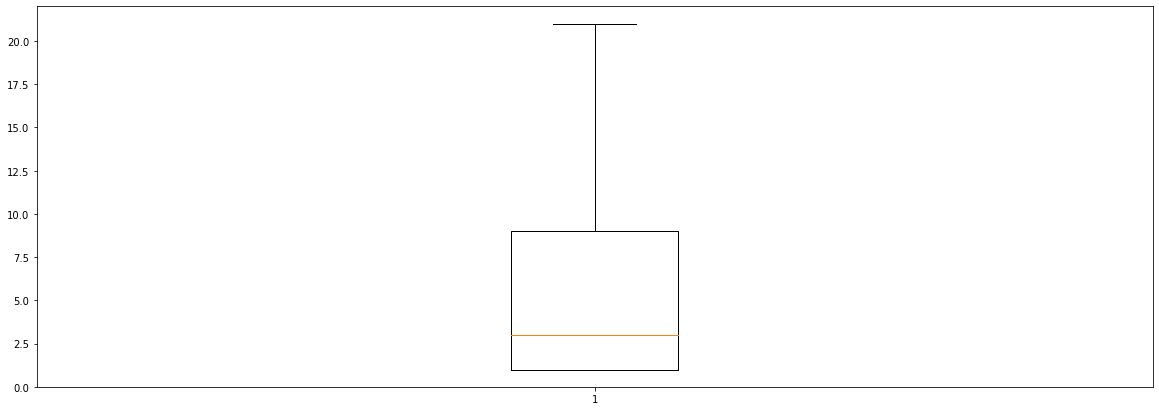

In [22]:
count = df['movieId'].value_counts()
plt.figure(figsize=(20,7))
plt.boxplot(count, showfliers = False)

In [23]:
count = df['movieId'].value_counts()
count = pd.DataFrame(count)

In [24]:
count = count.rename({ 'movieId': 'count'}, axis=1)
count

,count
356,329
318,317
296,307
593,279
2571,278
...,...
152085,1
164367,1
98799,1
4573,1


In [25]:
count = count.rename_axis('movieId1').reset_index()
count

,movieId1,count
0,356,329
1,318,317
2,296,307
3,593,279
4,2571,278
...,...,...
9719,152085,1
9720,164367,1
9721,98799,1
9722,4573,1


In [26]:
count = count[count['count'] >=4]
count

,movieId1,count
0,356,329
1,318,317
2,296,307
3,593,279
4,2571,278
...,...,...
4175,3384,4
4176,88356,4
4177,4725,4
4178,3584,4


In [27]:
hcount = count['movieId1'].values
hcount

array([ 356,  318,  296, ..., 4725, 3584, 4808], dtype=int64)

In [28]:
def recommended_item_similarity(user_id):
  #First selecting a movie that the user has watched and performing the item similarity function on that movie
    user_movie= df[(df.userId==user_id) & df.rating.isin([5,4])][['title']]
    user_movie=user_movie.iloc[0,0]
    item_similarity(user_movie)
  
  #Sorting all the other movies based on the similarity scores
    sorted_movies_as_per_userChoice = movies.sort_values( ["similarity"], ascending = False )
   
    sorted_movies_as_per_userChoice = sorted_movies_as_per_userChoice[sorted_movies_as_per_userChoice['similarity'] >=0.45]['movie_id']
   
    recommended_movies=list()
    df_recommended_item=pd.DataFrame()
    
  #A list of all the movies the user has watched
    user2Movies= ratings[(ratings['userId']== user_id)&(ratings['movieId'].isin(hcount))]['movieId']
    
  #Checking if the similar movies have been watched by the user already, if not adding them to a recommended list  
    for movieId in sorted_movies_as_per_userChoice:
            if movieId not in user2Movies:
                
                #Adding the movies to the list based on their average rating.
                df_new= df2[(df2.movieId1==movieId)]
                df_recommended_item=pd.concat([df_recommended_item,df_new])    
            best10=df_recommended_item.sort_values(["rating"], ascending = False)[1:10] 
    return best10['movieId1']

In [29]:
#Converting all the movieids to their respective movie titles

def movieIdToTitle(listMovieIDs):
    try:
        movie_titles= list()
        for id in listMovieIDs:
            movie_titles.append(movies[movies['movie_id']==id]['title'])
        return movie_titles
    except:
        print("Invalid Input!")

In [30]:
user_id=50
print("Recommended movies,:\n",movieIdToTitle(recommended_item_similarity(user_id)))

Recommended movies,:
 [895    Paris Is Burning (1990)
Name: title, dtype: object, 277    Shawshank Redemption, The (1994)
Name: title, dtype: object, 910    Once Upon a Time in the West (C'era una volta ...
Name: title, dtype: object, 906    Lawrence of Arabia (1962)
Name: title, dtype: object, 659    Godfather, The (1972)
Name: title, dtype: object, 922    Godfather: Part II, The (1974)
Name: title, dtype: object, 46    Usual Suspects, The (1995)
Name: title, dtype: object, 899    Princess Bride, The (1987)
Name: title, dtype: object, 224    Star Wars: Episode IV - A New Hope (1977)
Name: title, dtype: object]


In [31]:
tags.info

<bound method DataFrame.info of       userId  movieId               tag   timestamp
0          2    60756             funny  1445714994
1          2    60756   Highly quotable  1445714996
2          2    60756      will ferrell  1445714992
3          2    89774      Boxing story  1445715207
4          2    89774               MMA  1445715200
...      ...      ...               ...         ...
3678     606     7382         for katie  1171234019
3679     606     7936           austere  1173392334
3680     610     3265            gun fu  1493843984
3681     610     3265  heroic bloodshed  1493843978
3682     610   168248  Heroic Bloodshed  1493844270

[3683 rows x 4 columns]>

In [32]:
tagmovies = pd.read_csv('C:/Users/91951/Downloads/ml-latest-small/movies.csv')

In [33]:
df3 = pd.merge(left=tags,right=tagmovies,on='movieId')
del df3['timestamp']
df3['tag'] = df3['tag'].str.lower()
df3

,userId,movieId,tag,title,genres
0,2,60756,funny,Step Brothers (2008),Comedy
1,2,60756,highly quotable,Step Brothers (2008),Comedy
2,2,60756,will ferrell,Step Brothers (2008),Comedy
3,62,60756,comedy,Step Brothers (2008),Comedy
4,62,60756,funny,Step Brothers (2008),Comedy
...,...,...,...,...,...
3678,606,5694,70mm,Staying Alive (1983),Comedy|Drama|Musical
3679,606,6107,world war ii,Night of the Shooting Stars (Notte di San Lore...,Drama|War
3680,606,7936,austere,Shame (Skammen) (1968),Drama|War
3681,610,3265,gun fu,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller


In [34]:
alltags = df3['tag'].unique()
alltags = pd.DataFrame(alltags)
alltags.shape

(1475, 1)

In [35]:
df3[df3['title'] == 'Rain Man (1988)'] 

,userId,movieId,tag,title,genres
2158,474,1961,autism,Rain Man (1988),Drama


In [36]:
df3[df3['tag'].str.contains("funny", case = False)]

,userId,movieId,tag,title,genres
0,2,60756,funny,Step Brothers (2008),Comedy
4,62,60756,funny,Step Brothers (2008),Comedy
6,424,60756,funny,Step Brothers (2008),Comedy
51,62,119141,funny,The Interview (2014),Action|Comedy
96,62,2953,funny,Home Alone 2: Lost in New York (1992),Children|Comedy
101,62,3114,funny,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
264,62,68848,funny,"Brothers Bloom, The (2008)",Adventure|Comedy|Crime|Romance
271,62,71535,funny,Zombieland (2009),Action|Comedy|Horror
284,62,88405,funny,Friends with Benefits (2011),Comedy|Romance
299,62,99114,funny,Django Unchained (2012),Action|Drama|Western


In [37]:
df3[df3['tag'].str.contains('sex', case = False)]

,userId,movieId,tag,title,genres
194,62,34150,sexy female scientist,Fantastic Four (2005),Action|Adventure|Sci-Fi
241,62,53464,sexy female scientist,Fantastic Four: Rise of the Silver Surfer (2007),Action|Adventure|Sci-Fi
291,62,88405,sex,Friends with Benefits (2011),Comedy|Romance
574,599,296,homosexuality,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
626,599,296,r:graphic sexuality,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
640,599,296,sexy,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
726,125,62434,sexual humor,Zack and Miri Make a Porno (2008),Comedy|Drama|Romance
1654,474,488,sexuality,M. Butterfly (1993),Drama|Romance
2189,474,2076,sexuality,Blue Velvet (1986),Drama|Mystery|Thriller
2302,474,2712,sexuality,Eyes Wide Shut (1999),Drama|Mystery|Thriller


In [38]:
def tag_recommend(inp_tag):
    try:
            tagged = df3[df3['tag'].str.contains(inp_tag, case = False)][['movieId']]
      
            tagged = tagged['movieId'].unique()
            
            recommended_df=pd.DataFrame()
            cnt = count['movieId1'].values
            for id in tagged:
                if id in cnt:
                    new_df= df2[(df2.movieId1==id)]
                    recommended_df=pd.concat([recommended_df,new_df])    
                    best10=recommended_df.sort_values(["rating"], ascending = False)[1:10] 
                
                
        
            return best10['movieId1'].values       
    
    except:
            print("Try another tag!")

In [39]:
print(movieIdToTitle(tag_recommend('funny')))

[8475    Guardians of the Galaxy (2014)
Name: title, dtype: object, 9162    Big Short, The (2015)
Name: title, dtype: object, 8063    Django Unchained (2012)
Name: title, dtype: object, 1298    Big Lebowski, The (1998)
Name: title, dtype: object, 7154    Zombieland (2009)
Name: title, dtype: object, 2355    Toy Story 2 (1999)
Name: title, dtype: object, 8546    Big Hero 6 (2014)
Name: title, dtype: object, 8123    Croods, The (2013)
Name: title, dtype: object, 8881    Kung Fury (2015)
Name: title, dtype: object]


In [40]:
df4 = tagmovies.copy()


#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
df4['year'] = df4.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
df4['year'] = df4.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
df4['title'] = df4.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
df4['title'] = df4['title'].apply(lambda x: x.strip())
df4.head()

<ipython-input-40-8a2ae3112d78>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df4['title'] = df4.title.str.replace('(\(\d\d\d\d\))', '')


,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [41]:
df4['year'].describe

<bound method NDFrame.describe of 0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
9737    2017
9738    2017
9739    2017
9740    2018
9741    1991
Name: year, Length: 9742, dtype: object>

In [42]:
df4['year'] = pd.to_numeric(df4['year'], errors='coerce')

In [43]:
df4 = df4.dropna(subset=['year'])

df4['year'] = df4['year'].astype(int)
df4['year'].describe

<bound method NDFrame.describe of 0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
9737    2017
9738    2017
9739    2017
9740    2018
9741    1991
Name: year, Length: 9729, dtype: int32>

In [44]:
years = df4['year'].value_counts()
plt.boxplot

<function matplotlib.pyplot.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)>

In [45]:
years

2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1917      1
1908      1
1915      1
1922      1
1921      1
Name: year, Length: 106, dtype: int64

In [46]:
years = df4['year'].value_counts()
years = pd.DataFrame(years)
years

,year
2002,311
2006,295
2001,294
2007,284
2000,283
...,...
1917,1
1908,1
1915,1
1922,1


In [47]:
years = years.rename({ 'year': 'count'}, axis=1)

years = years.rename_axis('year').reset_index()

years

,year,count
0,2002,311
1,2006,295
2,2001,294
3,2007,284
4,2000,283
...,...,...
101,1917,1
102,1908,1
103,1915,1
104,1922,1


In [48]:
years = years[years['count'] >= years['count'].median()]
years

,year,count
0,2002,311
1,2006,295
2,2001,294
3,2007,284
4,2000,283
5,2009,282
6,2004,279
7,2003,279
8,2014,278
9,1996,276


In [49]:
years[years['year'] >= 2010]

,year,count
8,2014,278
10,2015,274
17,2011,254
18,2010,247
19,2013,239
21,2012,233
22,2016,218
27,2017,147
51,2018,41


In [50]:
def latest_recommend():
   
            latest_movieids = df4[df4['year'] >=2017]['movieId'].values
            
            recommended_df=pd.DataFrame()
            cnt = count['movieId1'].values
            for id in latest_movieids:
                
                if id in cnt:
                    new_df= df2[(df2.movieId1==id)]
                    recommended_df=pd.concat([recommended_df,new_df])    
                    best10=recommended_df.sort_values(["rating"], ascending = False)[1:10] 
                
                
        
            
            return best10['movieId1'].values       
    
        

In [51]:
print(movieIdToTitle(latest_recommend()))

[9521    Baby Driver (2017)
Name: title, dtype: object, 9463    Logan (2017)
Name: title, dtype: object, 8699    Untitled Spider-Man Reboot (2017)
Name: title, dtype: object, 9461    John Wick: Chapter Two (2017)
Name: title, dtype: object, 9496    Gifted (2017)
Name: title, dtype: object, 8694    Thor: Ragnarok (2017)
Name: title, dtype: object, 8693    Avengers: Infinity War - Part I (2018)
Name: title, dtype: object, 9466    The Big Sick (2017)
Name: title, dtype: object, 8695    Guardians of the Galaxy 2 (2017)
Name: title, dtype: object]


In [52]:
from fastapi import FastAPI

app = FastAPI()


@app.get("/api/item-recommendations")
async def find_recommendations(user_id: int):
    movies = movieIdToTitle(recommended_item_similarity(user_id))
    return {"recommendations" : movies}

@app.get("/api/tag-recommendations")
async def get_recommendations(inp_tag: str):
    tag_movies = movieIdToTitle(tag_recommend(inp_tag))
    return {"recommendations" : tag_movies}

@app.get("/api/latest-recommendations")
async def give_recommendations():
    latest = movieIdToTitle(latest_recommend())
    return {"recommendations" : latest}

In [53]:
import uvicorn
import nest_asyncio


nest_asyncio.apply()
uvicorn.run(app, port=8000)

INFO:     Started server process [20752]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:58339 - "GET / HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:58340 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:58340 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:58341 - "GET /api/item-recommendations?user_id=50 HTTP/1.1" 200 OK
Try another tag!
Invalid Input!
INFO:     127.0.0.1:58342 - "GET /api/tag-recommendations?inp_tag=gay HTTP/1.1" 200 OK
INFO:     127.0.0.1:58343 - "GET /api/latest-recommendations HTTP/1.1" 200 OK
INFO:     127.0.0.1:58344 - "GET /api/tag-recommendations?inp_tag=funny HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [20752]
